# Digital Image Processing — Student Assignment Notebook

**Spring 2026**  
**Topic:** Image I/O, grayscale/binary, cropping (ROI), color spaces, and basic arithmetic operations

Fill in the fields below and complete **all TODO cells**.

**Student name:** …  
**Student ID:** …  
**Date:** 2026-02-06


## 0) Environment check

Run the next cell. If you see import errors, install the missing packages (e.g., `pip install opencv-python matplotlib scikit-image`).

In [1]:
# Imports (run once)
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2

from skimage import data  # provides sample images (offline)

print("OpenCV:", cv2.__version__)


OpenCV: 4.13.0


## Helper functions (provided)

Use these helpers for consistent display and safe arithmetic on `uint8` images.

In [2]:
def to_rgb(img_bgr_or_rgb):
    """Ensure image is RGB uint8."""
    if img_bgr_or_rgb is None:
        raise ValueError("Image is None. Check the path or loading step.")
    img = img_bgr_or_rgb
    if img.ndim == 2:
        return img
    # If it came from cv2.imread it's BGR; if from skimage it's RGB.
    # We detect by heuristic: assume cv2 format if loaded via cv2.imread.
    return img

def load_image(path=None):
    """Load an RGB image. If path is missing, fall back to a built-in sample."""
    if path and os.path.exists(path):
        bgr = cv2.imread(path, cv2.IMREAD_COLOR)
        if bgr is None:
            raise ValueError(f"Failed to read: {path}")
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        return rgb
    # offline sample (RGB)
    return data.astronaut()

def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2", cmap1=None, cmap2=None):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(img1, cmap=cmap1); plt.title(title1); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(img2, cmap=cmap2); plt.title(title2); plt.axis('off')
    plt.axis('off')
    plt.show()

def clip_uint8(x):
    """Clip and convert to uint8."""
    return np.clip(x, 0, 255).astype(np.uint8)


## 1) Load an image (you choose)

Preferred: place an image file (e.g., `fruit basket.jpg`) in the same folder as this notebook and set `IMAGE_PATH`.

If you leave `IMAGE_PATH=None`, the notebook will use a built-in sample image.

Image shape (H, W, C): (512, 512, 3) | dtype: uint8


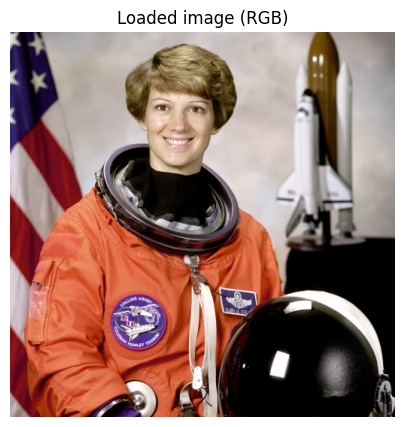

In [3]:
# TODO: set this to your image file name if you have one, e.g. "fruit basket.jpg"
IMAGE_PATH = None  # or "fruit basket.jpg"

img = load_image(IMAGE_PATH)
print("Image shape (H, W, C):", img.shape, "| dtype:", img.dtype)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Loaded image (RGB)")
plt.axis("off")
plt.show()


## 2) Image I/O basics

### Task 2.1 — Inspect pixels
1. Print the pixel value at `(row=0, col=0)` and at the image center.
2. Explain what the 3 numbers represent in an RGB image.

Write your answer under **Task 2.1 (Answer)**.

In [4]:
# TODO (Task 2.1): print two pixel values
h, w = img.shape[:2]
print("Top-left pixel:", img[0, 0])
print("Center pixel:", img[h//2, w//2])


Top-left pixel: [154 147 151]
Center pixel: [19 14  7]


**Task 2.1 (Answer):**  
- …

### Task 2.2 — Save and re-load
Save the loaded image to disk as `output_saved.png`, then load it again and verify:
- shape is the same
- dtype is `uint8`

Reloaded shape: (512, 512, 3) | dtype: uint8


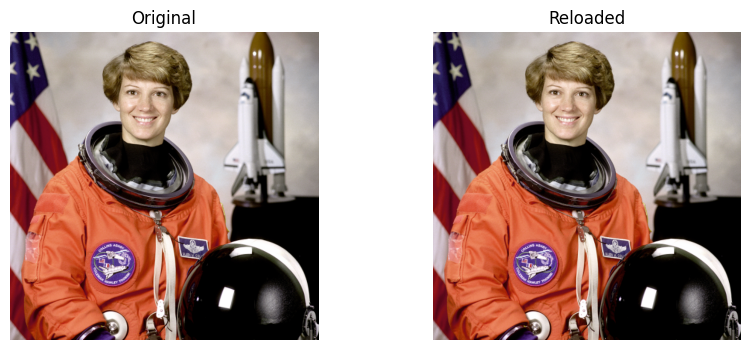

In [5]:
# TODO (Task 2.2): save and reload
out_path = "output_saved.png"

# OpenCV expects BGR when writing
bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(out_path, bgr)

reloaded_bgr = cv2.imread(out_path, cv2.IMREAD_COLOR)
reloaded_rgb = cv2.cvtColor(reloaded_bgr, cv2.COLOR_BGR2RGB)

print("Reloaded shape:", reloaded_rgb.shape, "| dtype:", reloaded_rgb.dtype)
show_side_by_side(img, reloaded_rgb, "Original", "Reloaded")


## 3) Grayscale and binary images

### Task 3.1 — Convert to grayscale
Create a grayscale version of the image using OpenCV. Display original vs grayscale.

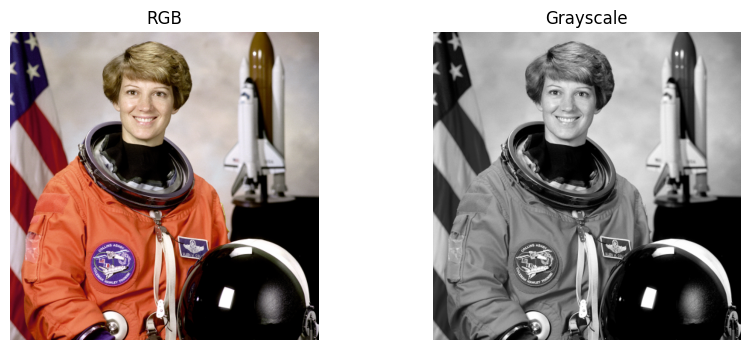

Gray shape: (512, 512) | dtype: uint8


In [6]:
# TODO (Task 3.1): grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_side_by_side(img, gray, "RGB", "Grayscale", cmap2="gray")
print("Gray shape:", gray.shape, "| dtype:", gray.dtype)


### Task 3.2 — Threshold to binary
1. Create a binary image using a manual threshold (e.g., 128).
2. Create a binary image using Otsu's method.
3. Compare results (1–2 sentences).

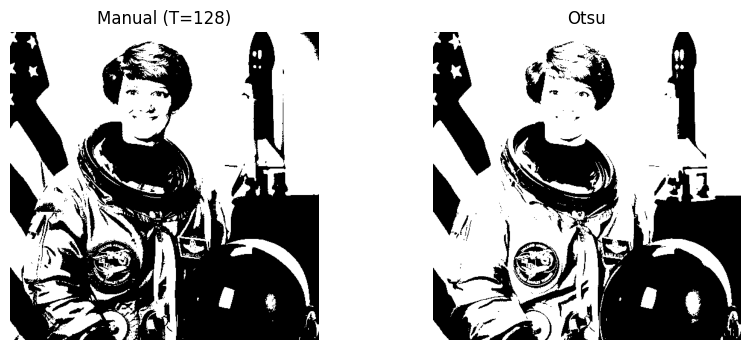

Otsu threshold chosen by OpenCV: 100.0


In [7]:
# TODO (Task 3.2): thresholding
th_manual = 128
_, binary_manual = cv2.threshold(gray, th_manual, 255, cv2.THRESH_BINARY)

_, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_side_by_side(binary_manual, binary_otsu, f"Manual (T={th_manual})", "Otsu", cmap1="gray", cmap2="gray")
print("Otsu threshold chosen by OpenCV:", _)


**Task 3.2 (Answer):**  
- …

## 4) Cropping (ROI)

### Task 4.1 — Crop a region of interest
1. Pick an ROI using array slicing: `img[y1:y2, x1:x2]`.
2. Display original and cropped ROI.

Tip: choose coordinates that capture a meaningful object/face.

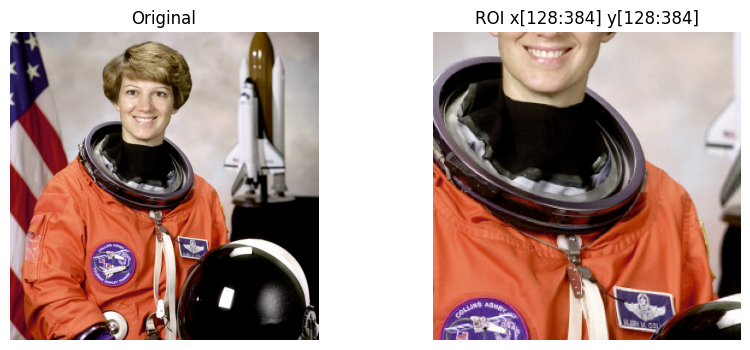

ROI shape: (256, 256, 3)


In [8]:
# TODO (Task 4.1): set ROI coordinates
h, w = img.shape[:2]
x1, y1 = int(0.25*w), int(0.25*h)
x2, y2 = int(0.75*w), int(0.75*h)

roi = img[y1:y2, x1:x2].copy()
show_side_by_side(img, roi, "Original", f"ROI x[{x1}:{x2}] y[{y1}:{y2}]")
print("ROI shape:", roi.shape)


### Task 4.2 — Explain coordinates
Explain why the slicing is `img[y, x]` (row-major) and not `img[x, y]`.

**Task 4.2 (Answer):**  
- …

## 5) Color spaces

### Task 5.1 — Convert RGB to HSV and visualize channels
1. Convert the image to HSV using OpenCV.
2. Display the H, S, and V channels as grayscale images.

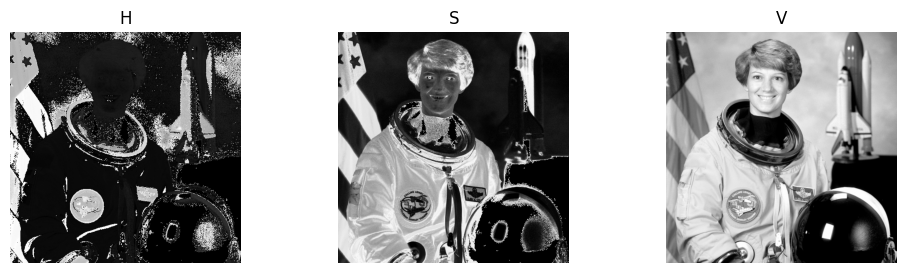

In [9]:
# TODO (Task 5.1): HSV conversion and channel display
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]

plt.figure(figsize=(12,3))
for i, (ch, name) in enumerate([(H,"H"), (S,"S"), (V,"V")], start=1):
    plt.subplot(1,3,i); plt.imshow(ch, cmap="gray"); plt.title(name); plt.axis("off")
plt.show()


## 6) Lab 2 — Basic arithmetic operations on images

This section follows the Lab 2 handout (Basic arithmetic operations on images): subtraction, addition, multiplication, division.

Use your loaded image. Operations should be done safely on `uint8` images (0–255). OpenCV functions (`cv2.add`, `cv2.subtract`, etc.) saturate at 0/255 automatically.

### 6.1 Subtracting an intensity (darkening)


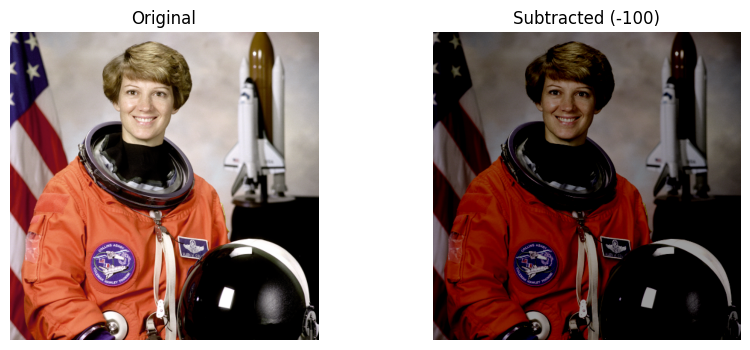

In [10]:
# Provided example (edit the constant and re-run)
sub_val = 100  # TODO: try 30, 100, 150
img_sub = cv2.subtract(img, sub_val)

show_side_by_side(img, img_sub, "Original", f"Subtracted (-{sub_val})")


**Task 6.1 (Answer):**
1. What happens when you increase `sub_val`?  
2. Why does the image get darker?  
- …

### 6.2 Subtract from *red channel only*
Modify only the **R** channel (in RGB) by subtracting a constant. Keep other channels unchanged.

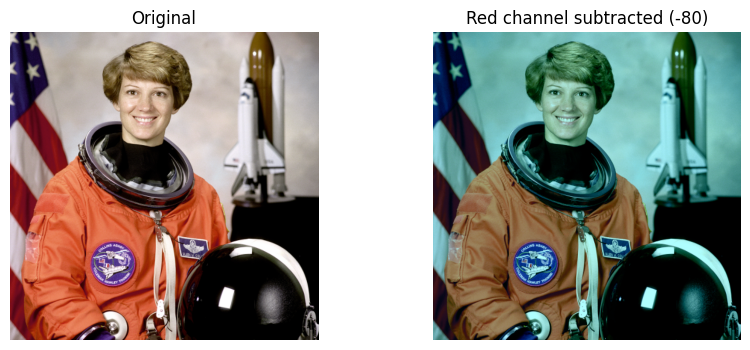

In [11]:
# TODO (Task 6.2): subtract from Red channel only
sub_val_r = 80

img_red_only = img.copy()
# RGB: channel 0=R, 1=G, 2=B
img_red_only[:,:,0] = cv2.subtract(img_red_only[:,:,0], sub_val_r)

show_side_by_side(img, img_red_only, "Original", f"Red channel subtracted (-{sub_val_r})")


### 6.3 Adding an intensity (brightening)

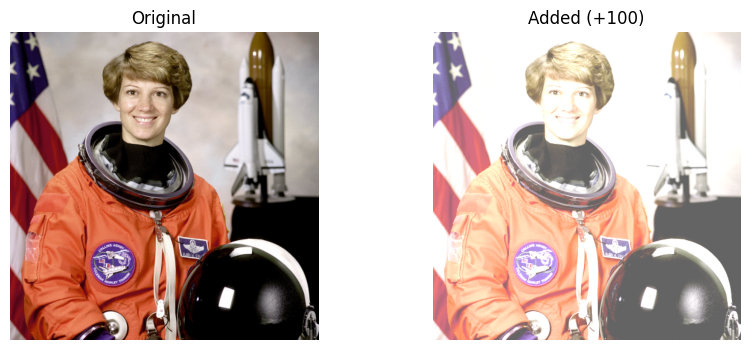

In [12]:
add_val = 100  # TODO: try 30, 100, 150
img_add = cv2.add(img, add_val)

show_side_by_side(img, img_add, "Original", f"Added (+{add_val})")


**Task 6.3 (Answer):**
1. What happens when you increase `add_val`?  
2. Why does the image get brighter?  
- …

### 6.4 Add to *red channel only*

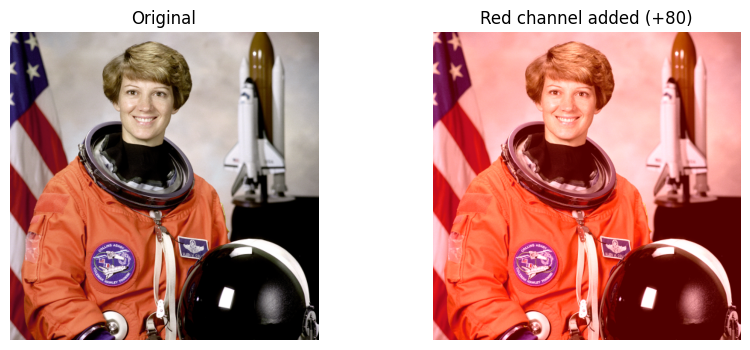

In [13]:
# TODO (Task 6.4): add to Red channel only
add_val_r = 80

img_red_only_add = img.copy()
img_red_only_add[:,:,0] = cv2.add(img_red_only_add[:,:,0], add_val_r)

show_side_by_side(img, img_red_only_add, "Original", f"Red channel added (+{add_val_r})")


### 6.5 Multiplying by a constant (contrast/brightness change)

Use `cv2.multiply` with a float factor. Convert to `float32` first, then clip back to `uint8`.

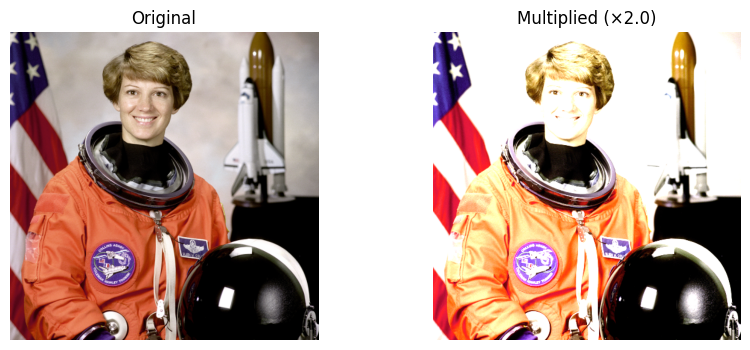

In [14]:
# TODO: try factors like 0.5, 1.2, 2.0
factor = 2.0

img_f = img.astype(np.float32)
img_mul = clip_uint8(img_f * factor)

show_side_by_side(img, img_mul, "Original", f"Multiplied (×{factor})")


**Task 6.5 (Answer):**
- Discuss the effect of multiplying by a factor > 1 vs < 1.  
- …

### 6.6 Dividing by a constant

Division by a number > 1 tends to darken; division by < 1 tends to brighten (but can saturate).

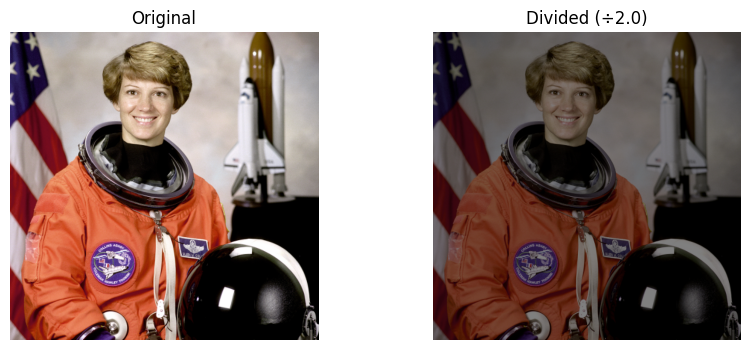

In [15]:
# TODO: try divisors like 2.0, 3.0, 0.5
divisor = 2.0

img_f = img.astype(np.float32)
img_div = clip_uint8(img_f / divisor)

show_side_by_side(img, img_div, "Original", f"Divided (÷{divisor})")


**Task 6.6 (Answer):**
- Compare dividing by a number greater than 1 versus less than 1.  
- …

## 7) Mini-report (required)

Write a short report (150–250 words) describing:
- what you learned
- which operation(s) were most useful and why
- any issues you encountered (file paths, color order, dtype, etc.)

**Report:**  
In this assignment I worked through the core image I/O and manipulation operations in Python using OpenCV, NumPy, and scikit-image. Starting from loading and inspecting pixel values, I built up to grayscale conversion, binary thresholding, ROI cropping, HSV color-space decomposition, and four basic arithmetic operations (subtraction, addition, multiplication, division).

The most useful operations were BGR→RGB conversion and saturating arithmetic via cv2.add/cv2.subtract. OpenCV's default BGR channel order is the single biggest source of confusion when mixing it with Matplotlib; remembering to call cv2.cvtColor(img, cv2.COLOR_BGR2RGB) immediately after cv2.imread prevents color-shifted output every time. Saturating arithmetic matters equally — performing addition or subtraction directly on uint8 arrays with NumPy wraps around (e.g., 250 + 20 = 14), while cv2.add clips at 255, which is almost always the intended behavior.

Issues encountered:

File path: cv2.imread returns None silently when the path is wrong; always check if img is None.
Color order: BGR vs RGB caused the red and blue channels to appear swapped until the conversion was applied.
dtype: Multiplying uint8 arrays by a float requires casting to float32 first, then clipping back with np.clip(..., 0, 255).astype(np.uint8) to avoid overflow or truncation.
Row-major indexing: NumPy uses img[row, col] = img[y, x], which is the opposite of the typical (x, y) convention in geometry.

## Submission checklist
Include in your submission:
1. This completed notebook (`.ipynb`)
2. Screenshots/outputs of: original RGB, grayscale, binary, cropping ROI channels, and arithmetic operations
3. Your answers in the markdown answer blocks
